In [17]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from scipy.io import loadmat

data=loadmat('data/logistic')
X,y=data['X'],data['y'].ravel()


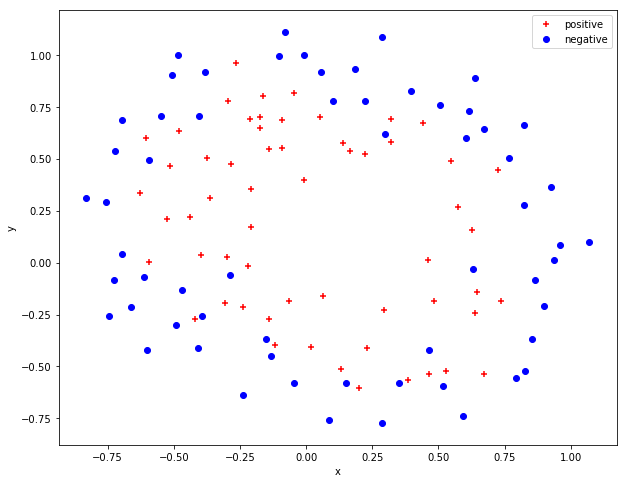

In [19]:
posidx,negdix=y==1,y==0
plt.scatter(X[posidx,0],X[posidx,1],marker='+',c='r')
plt.scatter(X[negdix,0],X[negdix,1],marker='o',c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['positive','negative'])

# Split Data into train AND validate,boring...

In [20]:
def splitData(X,y):
    total=X.shape[0]
    index=np.arange(total)
    np.random.shuffle(index)
    numtrain=int(np.ceil(total*0.8))
    X_train,y_train=X[index[:numtrain]],y[index[:numtrain]]
    X_val,y_val=X[index[numtrain:]],y[index[numtrain:]]
    return X_train,y_train,X_val,y_val
X_train,y_train,X_val,y_val=splitData(X,y)

print X_train.shape,X_val.shape
print np.mean(y_val==1)

(95L, 2L) (23L, 2L)
0.608695652174


In [36]:
def showTrace(classifer):
    from numpy.random import uniform, seed
    from matplotlib.mlab import griddata
    import matplotlib.pyplot as plt
    import numpy as np
    # make up data.
    npts = 300
    seed(0)
    npts = 100
    xs = uniform(-1, 1.6, npts)
    ys = uniform(-1, 1.6, npts)
    positive,negative=[],[]
    for x in xs:
        for y in ys:
            r=classifier.predict(np.array([[x,y]]))[0]
            if r==1:positive.append([x,y])
            else:negative.append([x,y])

    plt.scatter(X[posidx,0],X[posidx,1],marker='+',c='r')
    plt.scatter(X[negdix,0],X[negdix,1],marker='o',c='b')

    positive=np.array(positive)
    negative=np.array(negative)

    if len(positive)>0:
        plt.scatter(positive[:,0],positive[:,1],marker='.',c='yellow')        
    if len(negative)>0:
        plt.scatter(negative[:,0],negative[:,1],marker='.',c='green') 

In [33]:
learnrate=[0]
regular=[0]
print "default:",-np.log(0.5)
for lr in learnrate:
    for re in regular:
        classifier=classifier=TwoLayerNet(input_size=2,hidden_size=5,output_size=2)
        stat=classifier.train(X_train,y_train,X_val,y_val,verbose=True,learning_rate=lr,reg=re,batch_size=30,num_iters=300)
        print classifier.predict(X_val)
        print 'accuracy:',np.mean(classifier.predict(X_val)==y_val)


default: 0.69314718056
iterations_per_epoch 3
iteration 0 / 300: loss 0.693147
iteration 100 / 300: loss 0.693147
iteration 200 / 300: loss 0.693147
[0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1]
accuracy: 0.695652173913


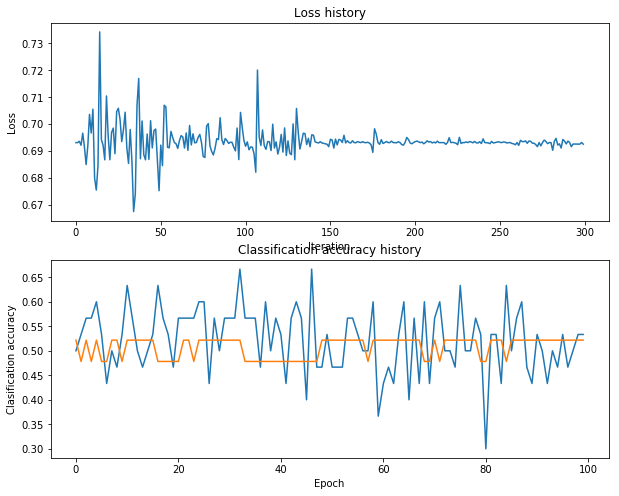

In [27]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stat['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stat['train_acc_history'], label='train')
plt.plot(stat['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()